In [1]:
import re
import time
import io
import os
import json
import pandas as pd
from optparse import OptionParser
from pandas import DataFrame, read_csv
path='./'

In [2]:
#import pickle
#with open(path+'dic_data_seg.pkl', "rb") as fout:
#     dic=pickle.load(fout)

In [3]:
#from pandas.io.json import json_normalize
#df = pd.DataFrame.from_dict(json_normalize(dic), orient='columns')
#df = df.T
#df.head()
#allData = pd.DataFrame(columns=['docClass', 'classID', 'className', 'docTitle', 'docs'])
#allData

In [4]:
#import pandas as pd
#for i in range(len(df)):
#    docClass, classID, className, docTitle, docs = df.iloc[i, 0]
#    allData.loc[i, 'docClass'] = docClass
#    allData.loc[i, 'classID'] = classID
#    allData.loc[i, 'className'] = className
#    allData.loc[i, 'docTitle'] = docTitle
#    allData.loc[i, 'docs'] = docs
#    if i % 1000 == 0:
#        print(i)
#allData.head()
#pd.to_pickle(allData, 'allData.pkl')

In [5]:
import pickle
with open('test.pkl', "rb") as fout:
     allData=pickle.load(fout)
allData

,className,docClass,docs
0,1062890.txt,1,2017 年景 氣 及 市 場 回 顧 \n2017 年 諸 多 國 際 重要 事件 之 ...
1,1062836.txt,4,回 顧 106 年 美 國 聯 準 會 升息 三次 且 啟 動 縮 減 資 產 負 ...
2,1062891.txt,5,壹 致 股 東 報 告 書 \n 親 愛 的 股 東 女士 先生 \n106 年 全...
3,1062801.txt,6,壹 致 股 東 報 告 書 \n 張 明道 \n106 年 全球 景 氣 持 ...
4,1062834.txt,6,壹 致 股 東 報 告 書 \n05 10 10 11 11\n 一 106 ...
5,1062838.txt,6,一 106 年度 營 業 成果 \n 一 國 內 外 金融 環 境 \n106 ...
6,1062845.txt,6,各位 女士 先生 \n 回 顧 106 年 全球 經 濟 景 氣 復 甦 ...
7,1062849.txt,6,各位 股 東 女士 先生 \n 回 顧 去年 全球 經 濟 擺 脫 停 滯 陰...
8,1062880.txt,6,一 集 團 106 年度 經 營 結 果 \n 一 106 年度 國...
9,1062883.txt,6,壹 致 股 東 報 告 書 \n 回 顧 民 國 下同 106 年度 ...


In [6]:
mergeData = allData.groupby(['docClass', 'className'])['docs'].apply(' '.join).reset_index()
mergeData.head()

,docClass,className,docs
0,1,1062890.txt,2017 年景 氣 及 市 場 回 顧 \n2017 年 諸 多 國 際 重要 事件 之 ...
1,4,1062836.txt,回 顧 106 年 美 國 聯 準 會 升息 三次 且 啟 動 縮 減 資 產 負 ...
2,5,1062891.txt,壹 致 股 東 報 告 書 \n 親 愛 的 股 東 女士 先生 \n106 年 全...
3,6,1062801.txt,壹 致 股 東 報 告 書 \n 張 明道 \n106 年 全球 景 氣 持 ...
4,6,1062834.txt,壹 致 股 東 報 告 書 \n05 10 10 11 11\n 一 106 ...


In [7]:
#mergeData['docClass'][mergeData['docClass'] == "動物"] = 'animal'
#mergeData['docClass'][mergeData['docClass'] == "環保"] = 'environ'
#mergeData.head()

In [8]:
corpus = mergeData['docs'].values.tolist()
len(corpus)

21

In [9]:
# TF-IDF
# coding:utf-8  
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(min_df = 0.2)  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [10]:
features = tfidf.toarray()
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04971996, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02425237, 0.02586226,
        0.02283235],
       ...,
       [0.        , 0.        , 0.        , ..., 0.02690855, 0.05738951,
        0.0886655 ],
       [0.        , 0.03057905, 0.03277648, ..., 0.02867555, 0.        ,
        0.        ],
       [0.06373273, 0.        , 0.06373273, ..., 0.05575861, 0.0594599 ,
        0.05249384]])

In [11]:
labels = mergeData['className'].values
labels

array(['1062890.txt', '1062836.txt', '1062891.txt', '1062801.txt',
       '1062834.txt', '1062838.txt', '1062845.txt', '1062849.txt',
       '1062880.txt', '1062883.txt', '1062885(缺).txt', '1062886.txt',
       '1062887.txt', '1062888(缺).txt', '1062889(缺).txt', '1062892.txt',
       '1065880.txt', '1062809.txt', '1062881(缺).txt', '1062882.txt',
       '1062884.txt'], dtype=object)

In [12]:
# PCA
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)

numpy.ndarray

In [13]:
mergeData['pca1'] = DataFrame(transData[:,0])
mergeData['pca2'] = DataFrame(transData[:,1])
mergeData.head()

,docClass,className,docs,pca1,pca2
0,1,1062890.txt,2017 年景 氣 及 市 場 回 顧 \n2017 年 諸 多 國 際 重要 事件 之 ...,0.443770,0.016142
1,4,1062836.txt,回 顧 106 年 美 國 聯 準 會 升息 三次 且 啟 動 縮 減 資 產 負 ...,-0.429829,0.153724
2,5,1062891.txt,壹 致 股 東 報 告 書 \n 親 愛 的 股 東 女士 先生 \n106 年 全...,0.105283,-0.228032
3,6,1062801.txt,壹 致 股 東 報 告 書 \n 張 明道 \n106 年 全球 景 氣 持 ...,-0.403764,0.117389
4,6,1062834.txt,壹 致 股 東 報 告 書 \n05 10 10 11 11\n 一 106 ...,-0.449203,0.072616


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(x_vars=['pca1'], y_vars=['pca2'], data=mergeData, hue="docClass", size=5)

/home/dongdong/.local/lib/python3.5/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


In [15]:
textFrame = pd.DataFrame(features, columns = word)
textFrame.head()

,000,01,03,05,07,08,09,10,100,104,...,重要,金流,金融,防制,降低,需求,面向,首家,首度,香港
0,0.000000,0.00000,0.0,0.000000,0.000000,0.020258,0.000000,0.055710,0.032350,0.000000,...,0.013928,0.040516,0.427240,0.000000,0.000000,0.036275,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.04972,0.0,0.000000,0.024860,0.046625,0.000000,0.000000,0.000000,0.000000,...,0.048083,0.000000,0.451792,0.194545,0.018614,0.013915,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.016674,0.000000,0.000000,...,0.033347,0.000000,0.497655,0.110394,0.000000,0.043427,0.027721,0.024252,0.025862,0.022832
3,0.184176,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.047477,0.036758,0.026311,...,0.015826,0.000000,0.459224,0.104779,0.036758,0.013739,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.00000,0.0,0.032188,0.015015,0.014080,0.045045,0.077444,0.011242,0.000000,...,0.029041,0.070402,0.264852,0.256371,0.000000,0.042021,0.000000,0.000000,0.000000,0.013256


In [16]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [17]:
allF[np.nonzero(allF)]

array([0.02025809, 0.05571041, 0.0323496 , ..., 0.05575861, 0.0594599 ,
       0.05249384])

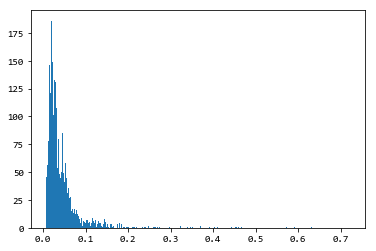

0.02941704568814423

In [18]:
plt.hist(nonZero, bins=500)
plt.show()
m

In [19]:
m = 0.1
dataset = list()
for i in range(len(features)):
    temp = textFrame.columns.values[[textFrame.iloc[i] >= m]]
    dataset.append(temp.tolist())

/home/dongdong/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [20]:
for i in range(len(features)):
    print(dataset[i]) 

['2017', '2018', 'ai', '中心', '交易', '公司', '分行', '基金', '方面', '最佳', '科技', '第二', '策略', '管理', '金融']
['106', '51', '主管', '分析', '利息', '增加', '存款', '年度', '授信', '提升', '提高', '收入', '收益', '放款', '政策', '本行', '法令', '遵循', '配合', '金融', '防制']
['106', '全球', '公司', '合集', '品牌', '子公司', '完善', '打造', '提升', '旗下', '治理', '海外', '良好', '董事', '金融', '防制']
['000', '106', '全球', '制度', '多元', '多元化', '存款', '推展', '提升', '支付', '放款', '政策', '本行', '管理', '遵循', '金融', '防制']
['105', '106', '107', '中小', '全球', '公司', '分行', '年度', '提升', '本行', '法令', '管理', '遵循', '金融', '防制']
['106', '107', 'twa', '信用', '利差', '功能', '吸引', '商品', '因素', '增加', '存款', '平均', '年度', '拓展', '提升', '提高', '收益', '政策', '本行', '比率', '策略', '通路', '金融']
['105', '106', '交易', '信用', '信用卡', '分行', '品牌', '存款', '平台', '年度', '提升', '支付', '放款', '整合', '方面', '本行', '管理', '通路', '金融', '防制']
['106', '一年', '同仁', '增加', '平均', '年底', '年度', '提升', '提存', '支付', '收益', '放款', '本行', '管理', '通路', '金融', '降低', '需求']
['106', '交易', '公司', '商品', '基金', '增加', '子公司', '平台', '年度', '建置', '提供', '提升', '效益', '管理', '金融']
['106', '

In [21]:
# Apriori: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
graph = df.T
graph.columns = mergeData['className']

In [22]:
graph.head()

className,1062890.txt,1062836.txt,1062891.txt,1062801.txt,1062834.txt,1062838.txt,1062845.txt,1062849.txt,1062880.txt,1062883.txt,...,1062886.txt,1062887.txt,1062888(缺).txt,1062889(缺).txt,1062892.txt,1065880.txt,1062809.txt,1062881(缺).txt,1062882.txt,1062884.txt
000,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
09,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
105,False,False,False,False,True,False,True,False,False,False,...,True,True,False,False,True,False,False,False,False,False
106,False,True,True,True,True,True,True,True,True,True,...,True,True,False,False,True,True,True,False,True,False


In [23]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

minsup = 0.03
apriori(graph, min_support = minsup, use_colnames=True)

,support,itemsets
0,0.144231,(1062890.txt)
1,0.201923,(1062836.txt)
2,0.153846,(1062891.txt)
3,0.163462,(1062801.txt)
4,0.144231,(1062834.txt)
5,0.221154,(1062838.txt)
6,0.192308,(1062845.txt)
7,0.173077,(1062849.txt)
8,0.144231,(1062880.txt)
9,0.163462,(1062883.txt)


In [24]:
result = apriori(graph, min_support = minsup)
result

,support,itemsets
0,0.144231,(0)
1,0.201923,(1)
2,0.153846,(2)
3,0.163462,(3)
4,0.144231,(4)
5,0.221154,(5)
6,0.192308,(6)
7,0.173077,(7)
8,0.144231,(8)
9,0.163462,(9)


In [25]:
rules = association_rules(result, metric="confidence", min_threshold=0.7)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(8, 9, 11, 16)",(7),0.048077,0.173077,0.038462,0.8,4.622222,0.030141,4.134615
1,"(8, 9, 11, 7)",(16),0.038462,0.086538,0.038462,1.0,11.555556,0.035133,inf
2,"(8, 9, 16, 7)",(11),0.048077,0.096154,0.038462,0.8,8.320000,0.033839,4.519231
3,"(8, 16, 11, 7)",(9),0.038462,0.163462,0.038462,1.0,6.117647,0.032175,inf
4,"(16, 9, 11, 7)",(8),0.038462,0.144231,0.038462,1.0,6.933333,0.032914,inf


In [26]:
rules = association_rules(result, metric="lift", min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(8, 9, 11, 16)",(7),0.048077,0.173077,0.038462,0.8,4.622222,0.030141,4.134615
1,"(8, 9, 11, 7)",(16),0.038462,0.086538,0.038462,1.0,11.555556,0.035133,inf
2,"(8, 9, 16, 7)",(11),0.048077,0.096154,0.038462,0.8,8.320000,0.033839,4.519231
3,"(8, 16, 11, 7)",(9),0.038462,0.163462,0.038462,1.0,6.117647,0.032175,inf
4,"(16, 9, 11, 7)",(8),0.038462,0.144231,0.038462,1.0,6.933333,0.032914,inf


In [27]:
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,"(8, 9, 11, 16)",(7),0.048077,0.173077,0.038462,0.8,4.622222,0.030141,4.134615,4
1,"(8, 9, 11, 7)",(16),0.038462,0.086538,0.038462,1.0,11.555556,0.035133,inf,4
2,"(8, 9, 16, 7)",(11),0.048077,0.096154,0.038462,0.8,8.320000,0.033839,4.519231,4
3,"(8, 16, 11, 7)",(9),0.038462,0.163462,0.038462,1.0,6.117647,0.032175,inf,4
4,"(16, 9, 11, 7)",(8),0.038462,0.144231,0.038462,1.0,6.933333,0.032914,inf,4


In [28]:
out = rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]
out.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,"(8, 9, 11, 16)",(7),0.048077,0.173077,0.038462,0.8,4.622222,0.030141,4.134615,4
1,"(8, 9, 11, 7)",(16),0.038462,0.086538,0.038462,1.0,11.555556,0.035133,inf,4
2,"(8, 9, 16, 7)",(11),0.048077,0.096154,0.038462,0.8,8.320000,0.033839,4.519231,4
3,"(8, 16, 11, 7)",(9),0.038462,0.163462,0.038462,1.0,6.117647,0.032175,inf,4
4,"(16, 9, 11, 7)",(8),0.038462,0.144231,0.038462,1.0,6.933333,0.032914,inf,4


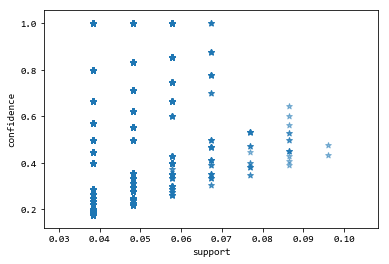

In [29]:
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [30]:
len(rules)
rules['antecedents'].head()

0    (8, 9, 11, 16)
1     (8, 9, 11, 7)
2     (8, 9, 16, 7)
3    (8, 16, 11, 7)
4    (16, 9, 11, 7)
Name: antecedents, dtype: object

In [31]:
import networkx as nx
G = nx.DiGraph()
for i in range(len(mergeData)):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

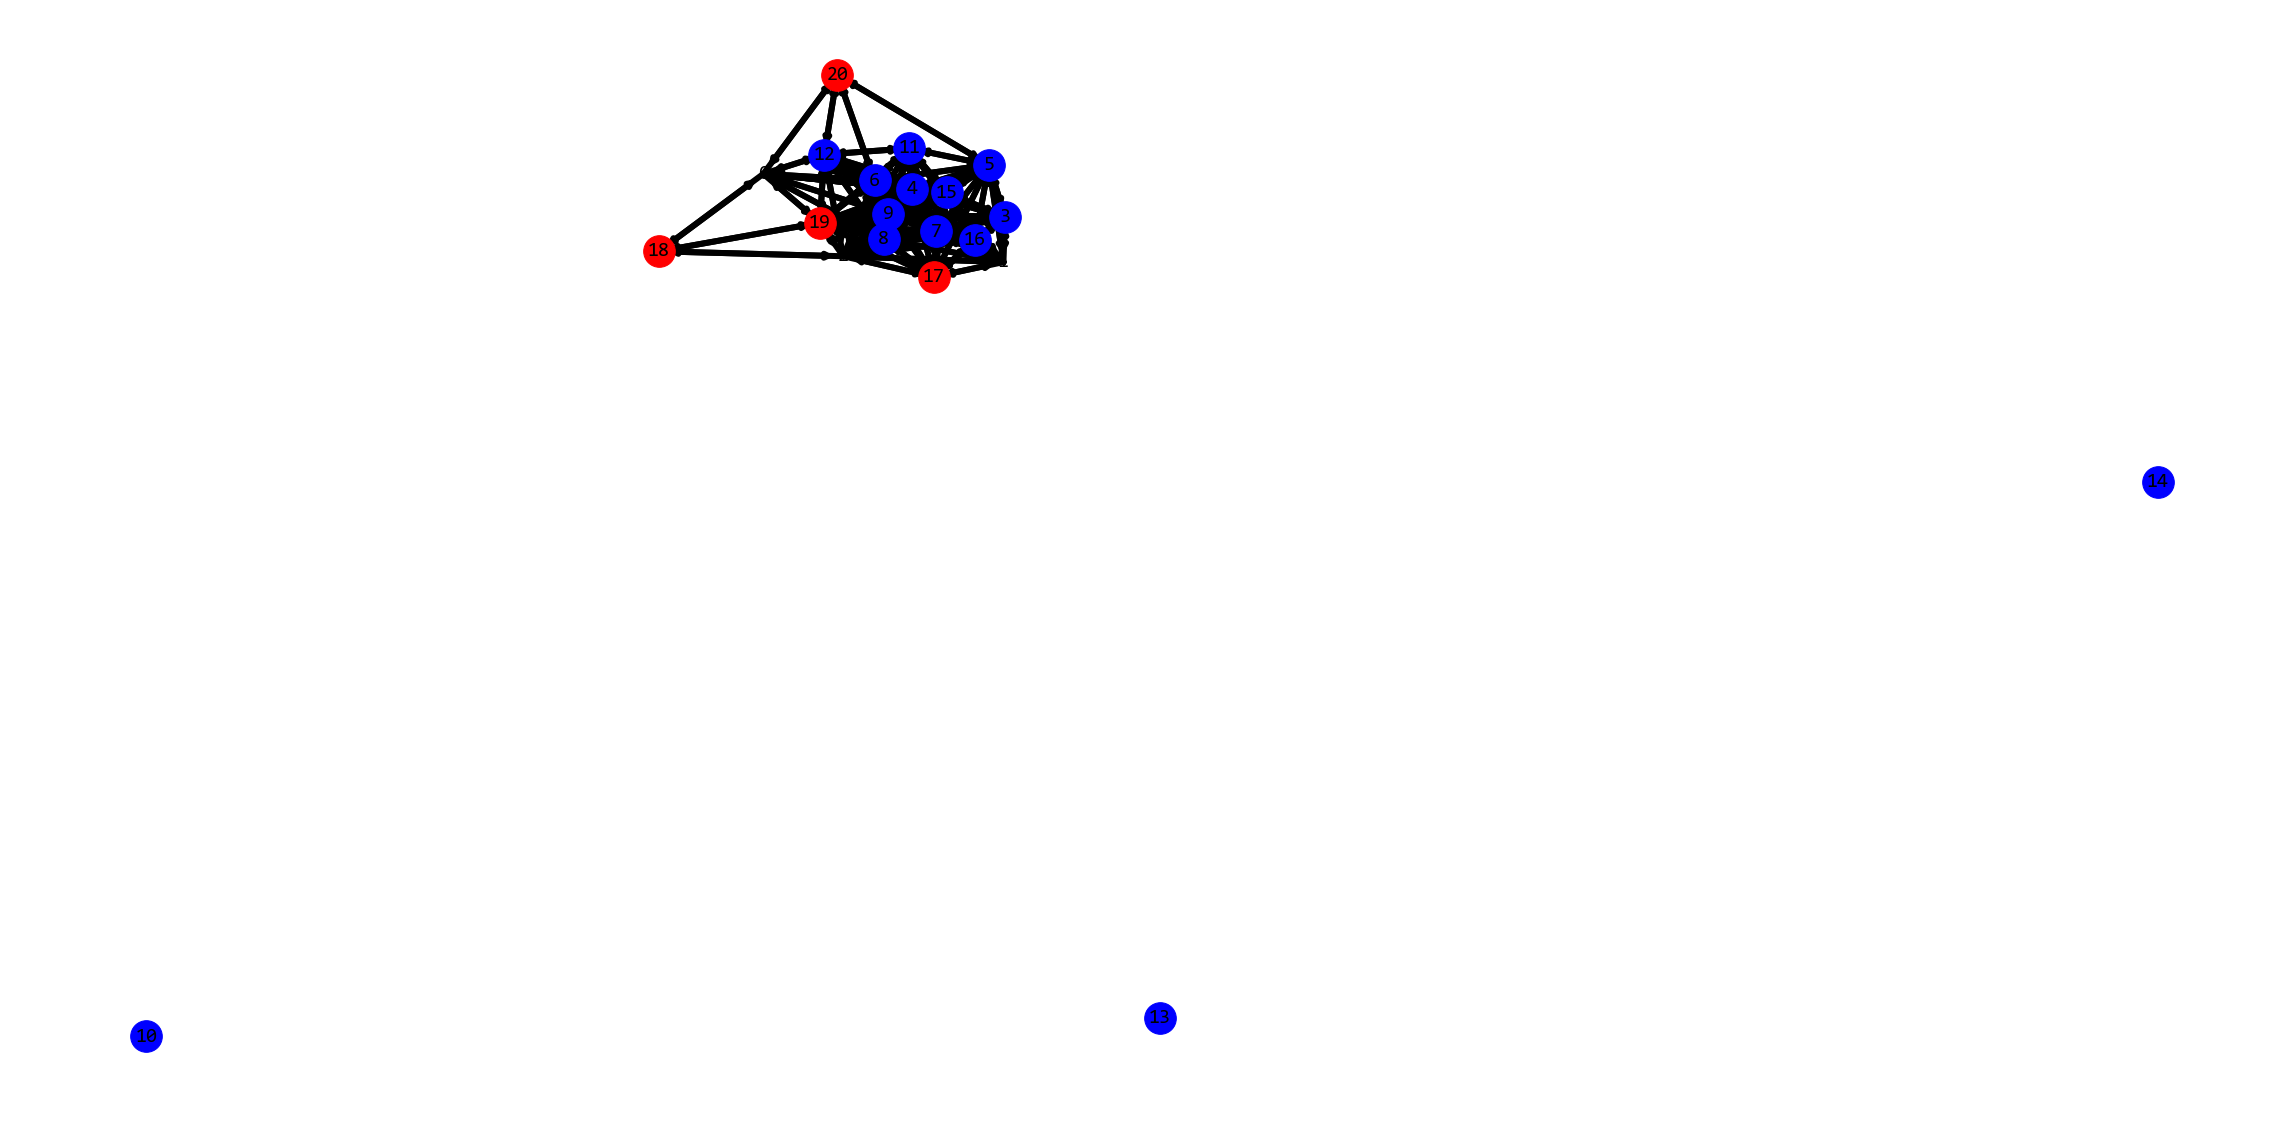

In [32]:
nodeListA = mergeData.index[mergeData['docClass'] == '6'].tolist()
nodeListB = mergeData.index[mergeData['docClass'] == '7'].tolist()

plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodeListA, node_color="b", node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=nodeListB, node_color="r", node_size=1000)
nx.draw_networkx_edges(G, pos, width=6)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
# plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [33]:
# 獨立議題，和其他社團無關聯
list(nx.isolates(G))

[10, 13, 14]

In [34]:
# 小群體
from networkx.algorithms.approximation import dominating_set
dominating_set.min_edge_dominating_set(G)

{(0, 18),
 (1, 16),
 (2, 3),
 (4, 5),
 (6, 7),
 (8, 9),
 (11, 19),
 (12, 20),
 (15, 17)}

In [35]:
pd.DataFrame(graph.columns)

,className
0,1062890.txt
1,1062836.txt
2,1062891.txt
3,1062801.txt
4,1062834.txt
5,1062838.txt
6,1062845.txt
7,1062849.txt
8,1062880.txt
9,1062883.txt
